In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
  
# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
X = glass_identification.data.features 
y = glass_identification.data.targets 

# Combine into a single DataFrame
df = pd.concat([X, y], axis=1)
print(f"Dataset loaded: {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset loaded: 214 rows and 10 columns.


In [9]:
print(df.columns)


Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass'], dtype='str')


In [10]:
print("--- Data Cleaning & Preprocessing ---")

# 1. Check for missing values (Required: isnull, notnull)
print(f"Total null values found: {df.isnull().sum().sum()}")
print(f"Total non-null values found: {df.notnull().sum().sum()}")

# 2. Handling Nulls (Required: dropna, fillna)
df_cleaned = df.dropna()
df_filled = df.fillna(df.mean(numeric_only=True))

# 3. Renaming and Replacing (Required: rename, replace, astype)
df = df.rename(columns={'Type_of_glass': 'Glass_Class'})

df['Glass_Label'] = df['Glass_Class'].astype(str).replace({
    '1': 'Building Windows Float',
    '2': 'Building Windows Non-Float',
    '3': 'Vehicle Windows Float',
    '4': 'Vehicle Windows Non-Float',
    '5': 'Containers',
    '6': 'Tableware',
    '7': 'Headlamps'
})

# Final conversion to category for ML efficiency
df['Glass_Class'] = df['Glass_Class'].astype('category')
df['Glass_Label'] = df['Glass_Label'].astype('category')

print("\nData preprocessing complete. Sample labels created:")
print(df[['Glass_Class', 'Glass_Label']].head())


--- Data Cleaning & Preprocessing ---
Total null values found: 0
Total non-null values found: 2140

Data preprocessing complete. Sample labels created:
  Glass_Class             Glass_Label
0           1  Building Windows Float
1           1  Building Windows Float
2           1  Building Windows Float
3           1  Building Windows Float
4           1  Building Windows Float


--- Visualizing Feature Distributions ---


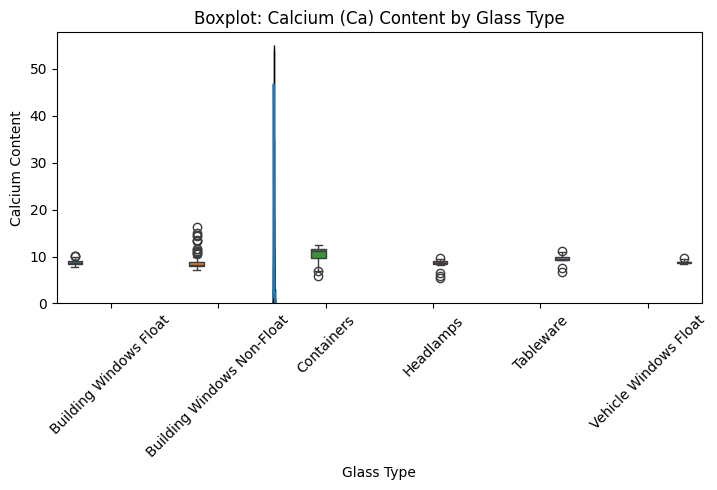

In [11]:
print("--- Visualizing Feature Distributions ---")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))

# 1. Histogram (Requirement: histogram)
plt.subplot(1, 2, 1)
sns.histplot(df['RI'], bins=20, kde=True)
plt.title('Histogram: Distribution of Refractive Index (RI)')
plt.xlabel('RI')
plt.ylabel('Frequency')

# 2. Boxplot (Requirement: boxplot)
sns.boxplot(
    x='Glass_Label',
    y='Ca',
    data=df,
    hue='Glass_Label',
    legend=False
)
plt.title('Boxplot: Calcium (Ca) Content by Glass Type')
plt.xlabel('Glass Type')
plt.ylabel('Calcium Content')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


--- Visualizing Relationships & Counts ---


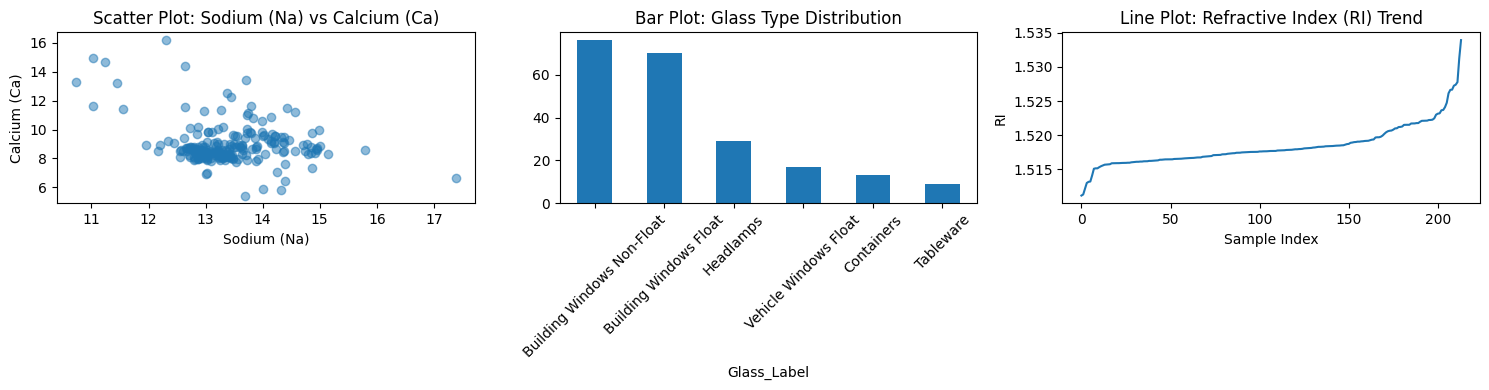

In [12]:
print("--- Visualizing Relationships & Counts ---")

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))

# 3. Scatter Plot (Requirement: scatter)
plt.subplot(1, 3, 1)
plt.scatter(df['Na'], df['Ca'], alpha=0.5)
plt.title('Scatter Plot: Sodium (Na) vs Calcium (Ca)')
plt.xlabel('Sodium (Na)')
plt.ylabel('Calcium (Ca)')

# 4. Bar Plot (Requirement: bar)
plt.subplot(1, 3, 2)
df['Glass_Label'].value_counts().plot(kind='bar')
plt.title('Bar Plot: Glass Type Distribution')
plt.xticks(rotation=45)

# 5. Line Plot (Requirement: line)
plt.subplot(1, 3, 3)
df['RI'].sort_values().reset_index(drop=True).plot(kind='line')
plt.title('Line Plot: Refractive Index (RI) Trend')
plt.xlabel('Sample Index')
plt.ylabel('RI')

plt.tight_layout()
plt.show()
